# Cost Function Analysis
This notebook intends to help analyse the different factors of the cost function used by CamoWorms.

## 1. Greedy algorithm setup

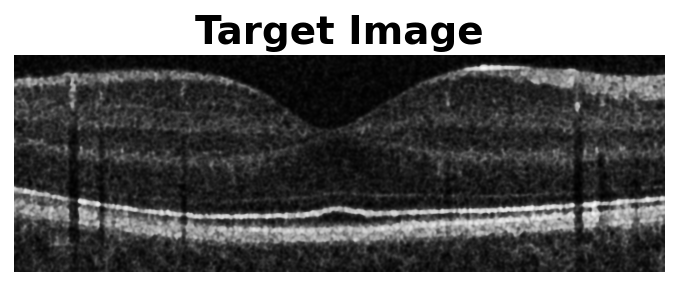

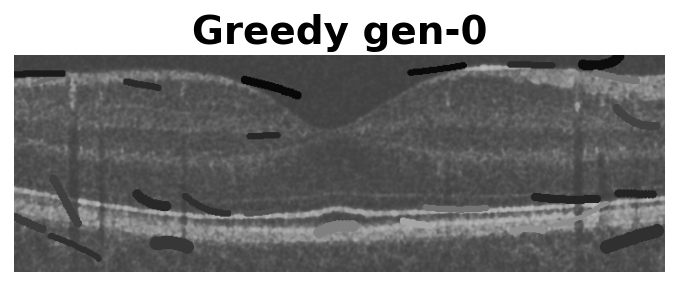

In [1]:
import numpy as np

from src.image_manipulation import crop
from src.algorithms.greedy import GreedyClewEvolution
from src.image_loading import load_image
import matplotlib as mpl
import matplotlib.pyplot as plt

# Controls the size of the plots.
mpl.rcParams['figure.dpi']= 140

image = crop(load_image("images", "original"), (320, 560, 160, 880))
ga = GreedyClewEvolution(image, 25)
ga.plot_clew(show_target_image=True)


## 2. Analysis of initial clew score

In [2]:
from src.algorithms.base_score import score_worm_considerations_isolated, score_worm_isolated
from src.worm_mask import WormMask


def analyse_clew(
        ga: GreedyClewEvolution
) -> tuple[float, float, float, float, float, float, float, float, float, float, float, float]:

    number_none = 0
    area_scores = []
    body_scores = []
    edge_scores = []
    consistency_scores = []
    overall_scores = []
    for worm in ga.clew:
        mask = WormMask.from_worm(worm, ga.image)
        outer_mask = mask.create_outer_mask()
        considerations = score_worm_considerations_isolated(worm.colour, mask, outer_mask)
        if considerations is None:
            number_none += 1
            continue

        area_score, body_score, edge_score, consistency_score = considerations
        area_scores.append(area_score)
        body_scores.append(body_score)
        edge_scores.append(edge_score)
        consistency_scores.append(consistency_score)
        overall_scores.append(score_worm_isolated(worm.colour, mask, outer_mask))

    return (
        float(number_none),
        float(len(ga.clew)),

        float(np.mean(np.array(area_scores))),
        float(np.mean(np.array(body_scores))),
        float(np.mean(np.array(edge_scores))),
        float(np.mean(np.array(consistency_scores))),
        float(np.mean(np.array(overall_scores))),

        float(np.std(np.array(area_scores))),
        float(np.std(np.array(body_scores))),
        float(np.std(np.array(edge_scores))),
        float(np.std(np.array(consistency_scores))),
        float(np.std(np.array(overall_scores)))
    )


print(
    "Invalid Worms={:.0f}\n"
    "Number of Worms={:.0f}\n"
    "Area Score={:.3f}\n"
    "Body Score={:.3f}\n"
    "Edge Score={:.3f}\n"
    "Consistency Score={:.3f}\n"
    "Overall Score={:.3f}".format(
        *list(analyse_clew(ga))[0:7]
    )
)
results = [analyse_clew(ga)]

Invalid Worms=0
Number of Worms=25
Area Score=-0.642
Body Score=-0.135
Edge Score=0.360
Consistency Score=-0.244
Overall Score=0.820


## 3. Run algorithm for many generations

Generation 1: SSIM = 0.294, Scores = 87 ± 55, [1, 197], Worms = 25  (took 0.55 sec)
Generation 2: SSIM = 0.294, Scores = 111 ± 63, [3, 215], Worms = 25  (took 0.40 sec)
Generation 3: SSIM = 0.299, Scores = 137 ± 69, [3, 242], Worms = 25  (took 0.40 sec)
Generation 4: SSIM = 0.303, Scores = 157 ± 75, [5, 269], Worms = 25  (took 0.41 sec)
Generation 5: SSIM = 0.308, Scores = 181 ± 88, [7, 349], Worms = 25  (took 0.41 sec)
Generation 6: SSIM = 0.307, Scores = 193 ± 92, [7, 372], Worms = 25  (took 0.42 sec)
Generation 7: SSIM = 0.311, Scores = 205 ± 99, [7, 405], Worms = 25  (took 0.43 sec)
Generation 8: SSIM = 0.313, Scores = 215 ± 103, [7, 405], Worms = 25  (took 0.42 sec)
Generation 9: SSIM = 0.316, Scores = 221 ± 104, [7, 414], Worms = 25  (took 0.43 sec)
Generation 10: SSIM = 0.317, Scores = 227 ± 109, [7, 430], Worms = 25  (took 0.44 sec)
Generation 11: SSIM = 0.318, Scores = 233 ± 112, [7, 430], Worms = 25  (took 0.46 sec)
Generation 12: SSIM = 0.319, Scores = 238 ± 113, [7, 437], W

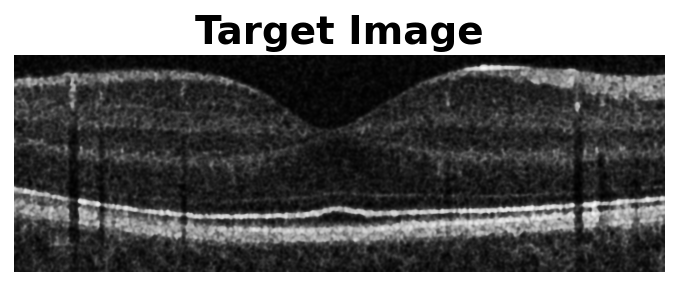

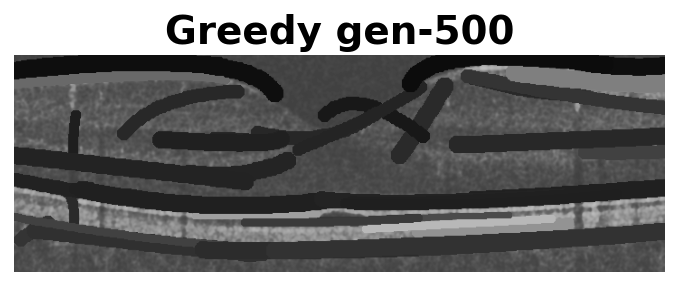

In [3]:
for i in range(500):
    ga.run_generation()
    results.append(analyse_clew(ga))

ga.plot_clew(show_target_image=True)

## 4. Plot score considerations over generations

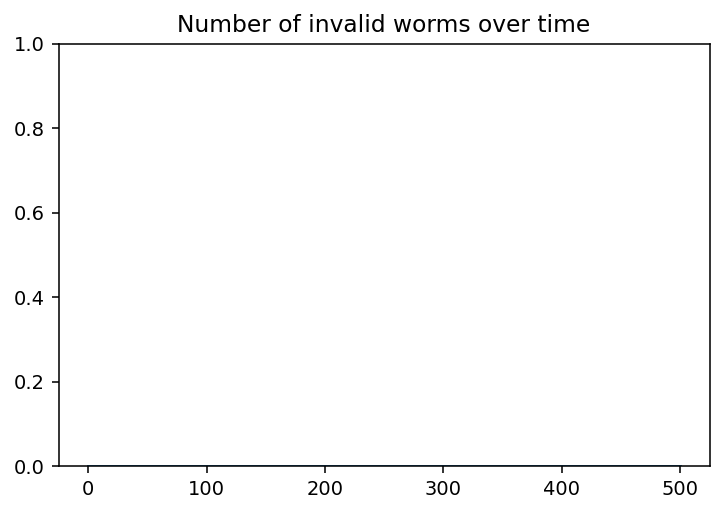

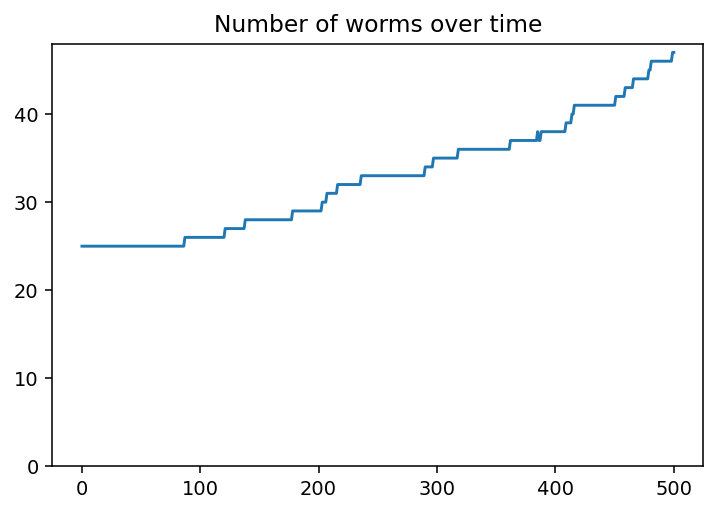

Mean Bias = 0.200
Mean Area = -0.748
Mean Body = 1.029
Mean Edge = 1.074
Mean Consistency = 1.018
Mean Overall = 6.684


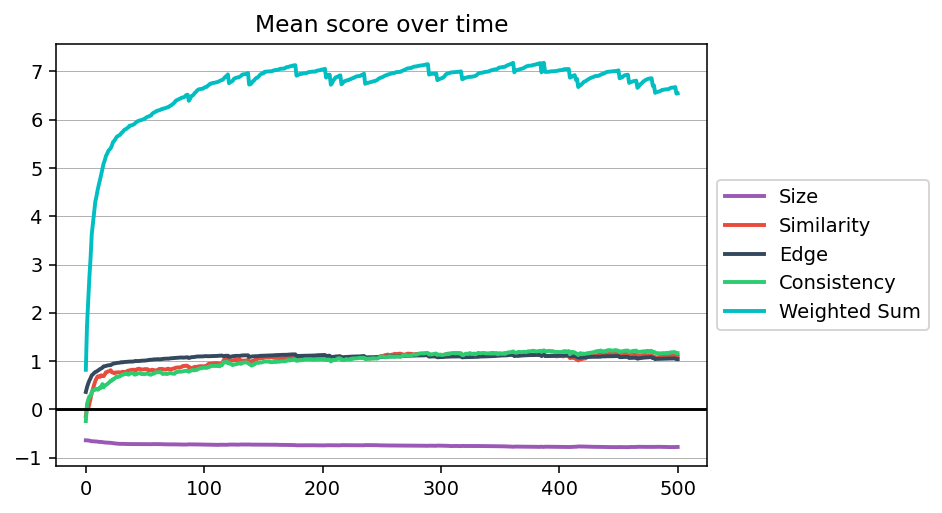

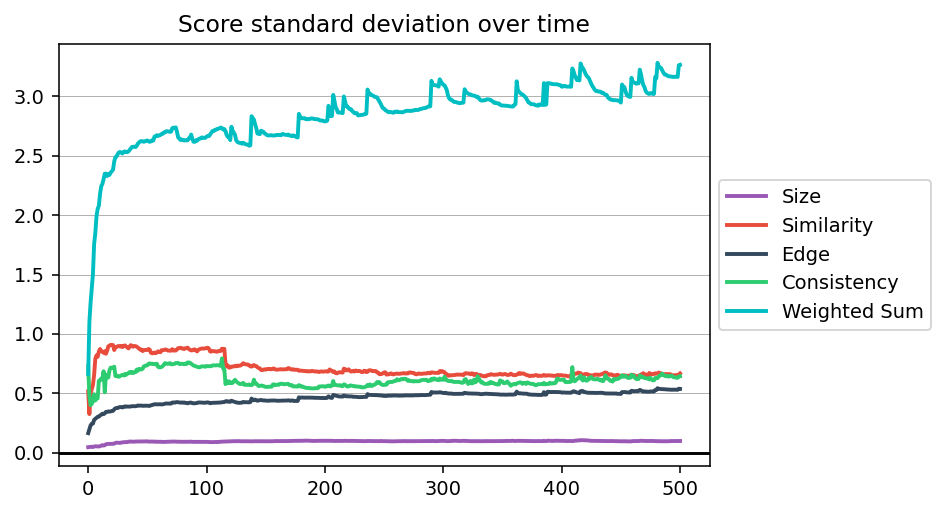

In [4]:
results = np.array(results)
results_none = results[:, 0]

results_generations = np.arange(0, len(results), 1)
results_bias = np.full((len(results),), 0.2)
results_no_worms = results[:, 1]

results_area = results[:, 2]
results_body = results[:, 3]
results_edge = results[:, 4]
results_consistency = results[:, 5]
results_overall = results[:, 6]

results_area_std = results[:, 7]
results_body_std = results[:, 8]
results_edge_std = results[:, 9]
results_consistency_std = results[:, 10]
results_overall_std = results[:, 11]

plt.plot(results_none)
plt.ylim((0, np.amax(results_none) + 1))
plt.title("Number of invalid worms over time")
plt.show()

plt.plot(results_no_worms)
plt.ylim((0, np.amax(results_no_worms) + 1))
plt.title("Number of worms over time")
plt.show()

print(f"Mean Bias = {np.mean(results_bias):.3f}")
print(f"Mean Area = {np.mean(results_area):.3f}")
print(f"Mean Body = {np.mean(results_body):.3f}")
print(f"Mean Edge = {np.mean(results_edge):.3f}")
print(f"Mean Consistency = {np.mean(results_consistency):.3f}")
print(f"Mean Overall = {np.mean(results_overall):.3f}")

# plt.stackplot(
#     results_generations,
#     results_bias, results_area, results_body, results_edge, results_consistency,
#     baseline="zero",
#     labels=["bias", "area", "body", "edge", "consistency", "overall"],
#     colors=["#aaaaaa", "#9b59b6", "#e74c3c", "#34495e", "#2ecc71"]
# )

result_arrays = [results_area, results_body, results_edge, results_consistency, results_overall]
result_array_labels = ["Size", "Similarity", "Edge", "Consistency", "Weighted Sum"]
result_array_colors = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71", "#00bec1"]
for arr, lab, col in zip(result_arrays, result_array_labels, result_array_colors):
    plt.plot(results_generations, arr, label=lab, color=col, linewidth=2)

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, which="major", axis="y", linewidth=0.5)
plt.axhline(y=0, color="#000000")
plt.title("Mean score over time")
plt.show()

result_arrays = [results_area_std, results_body_std, results_edge_std, results_consistency_std, results_overall_std]
result_array_labels = ["Size", "Similarity", "Edge", "Consistency", "Weighted Sum"]
result_array_colors = ["#9b59b6", "#e74c3c", "#34495e", "#2ecc71", "#00bec1"]
for arr, lab, col in zip(result_arrays, result_array_labels, result_array_colors):
    plt.plot(results_generations, arr, label=lab, color=col, linewidth=2)

# plt.legend(loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3, fancybox=True, shadow=True)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.grid(True, which="major", axis="y", linewidth=0.5)
plt.axhline(y=0, color="#000000")
plt.title("Score standard deviation over time")
plt.show()
